In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Caminho para o arquivo no Google Drive
file_path = '/content/drive/My Drive/train.csv'

# Ler o arquivo usando pandas
df = pd.read_csv(file_path)


In [ ]:
# Mostrar as primeiras linhas do dataframe
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


Dropado as colunas que não trazem nenhuma informação.

In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

In [ ]:
colunas_categoricas = [0, 1, 3, 4]

ordinal_columns = list(range(6, 20))

In [ ]:
for col in colunas_categoricas:
  df[df.columns[col]] = df[df.columns[col]].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

In [ ]:
corr_mat =df.corr(numeric_only=True)

<Axes: >

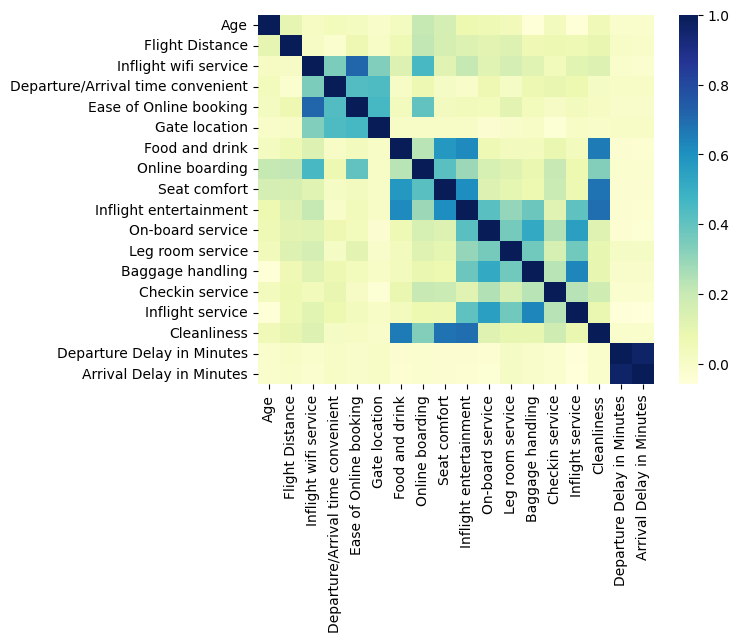

In [ ]:
sns.heatmap(corr_mat, cmap="YlGnBu")



Departure Delay in Minutes e Arrival Delay in Minutes são duas variáveis com uma forte relação linear positiva entre elas: 0,97.

In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


A única coluna que apresenta campos faltantes é a coluna `Arrival Delay in Minutes`. Como foi observado anteriormente, ela tem uma alta correlação com a coluna `Departure Delay in Minutes`. Devido a isso, decidimos remover uma delas, e como `Arrival Delay in Minutes` possui campos vazios, optamos por removê-la.

In [ ]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [ ]:
distribuicao = df['satisfaction'].value_counts();
print(distribuicao)

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


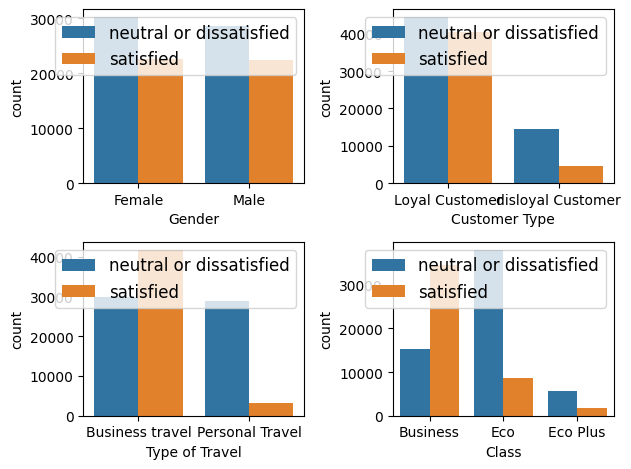

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2)


# Flatten the axs array to easily access each subplot
axs = axs.ravel()

for i, col in enumerate(colunas_categoricas):
    sns.countplot(x=df.columns[col], hue='satisfaction', data=df, ax=axs[i])
    axs[i].legend(loc='upper right', fontsize=12)  # Add legend for each subplot

plt.tight_layout()
plt.show()

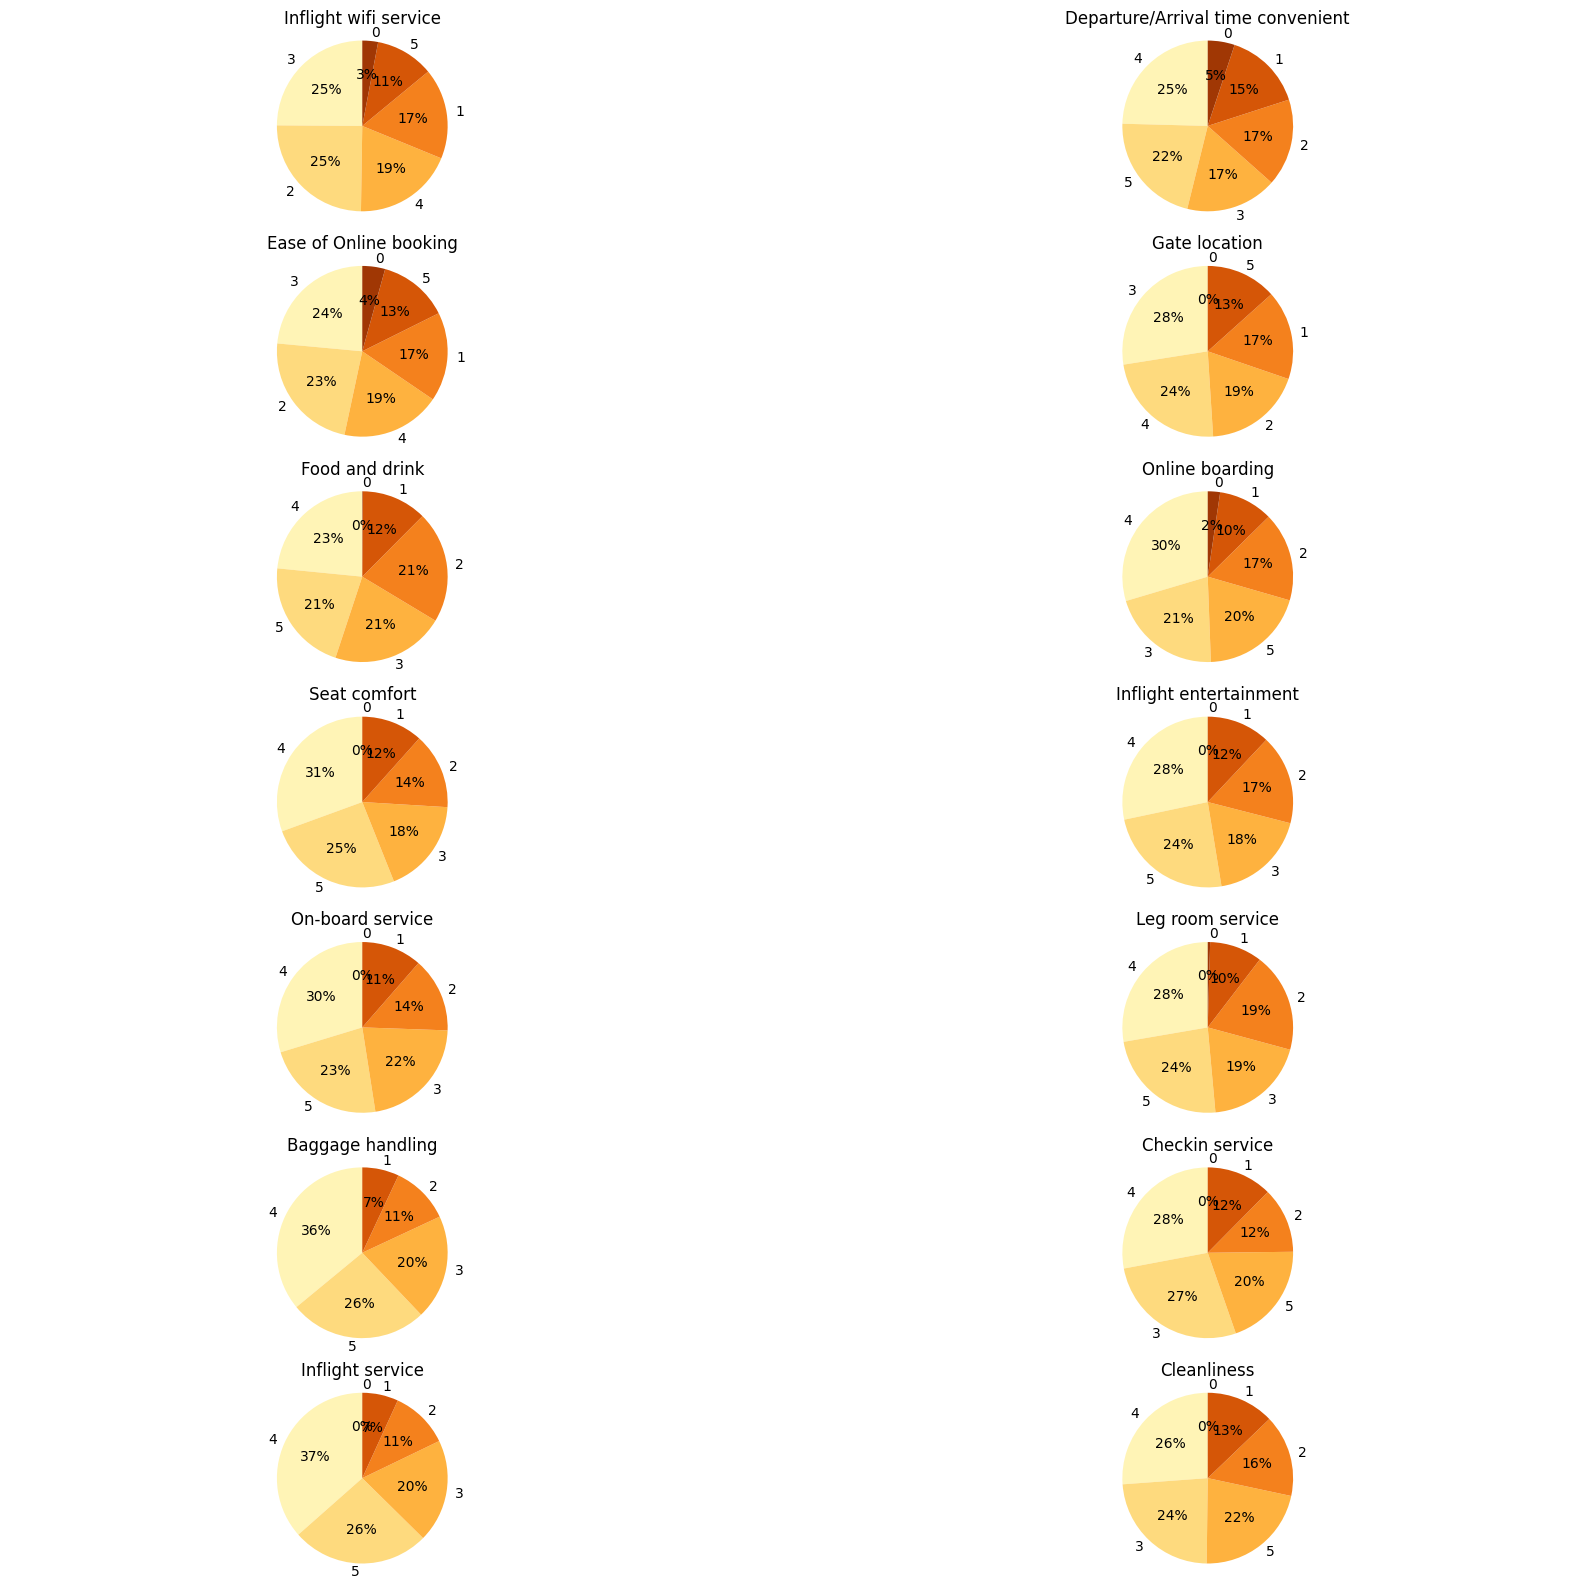

In [ ]:
categ = df.iloc[:,ordinal_columns]
fig, axes = plt.subplots(7, 2, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

Desses gráficos temos alguns pontos interessantes:


*   Homens e mulheres tem níveis de satisfação parecidos
*   Passageiros leais ficam menos insatisfeitos do que passageiros não leais
*   Passageiros na classe econômica estão mais insatisfeitos do que passageiros da classe executiva
*   Mais de 60% dos passageiros ficaram satisfeitos com o serviço de transporte de bagagem e serviço em voo (classificado de 4 a 5 em 5)
*  Mais de 50% dos passageiros estão satisfeitos com serviços de bordo, leg room service, entreterimento em voo e com o conforto dos assentos


## Analisando os dados numéricos

### Flight Distance


<ipython-input-69-1c116a5034bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "satisfaction", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])


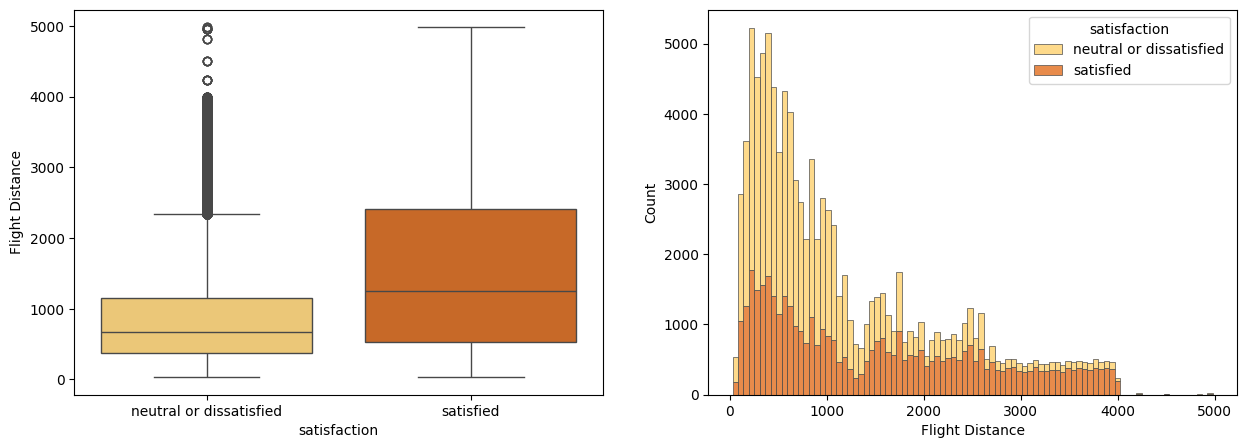

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "satisfaction", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x = "Flight Distance", hue = "satisfaction", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

In [ ]:
# Calcular o IQR para a coluna
Q1 = df["Flight Distance"].quantile(0.25)
Q3 = df["Flight Distance"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df["Flight Distance"] < lower_bound) | (df["Flight Distance"] > upper_bound)]

print(outliers.shape)

(2291, 22)


In [ ]:
# removendo outliers
df = df[(df['Flight Distance'] >= lower_bound) & (df['Flight Distance'] <= upper_bound)]

### Age

<ipython-input-72-225adf5fa614>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "satisfaction", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])


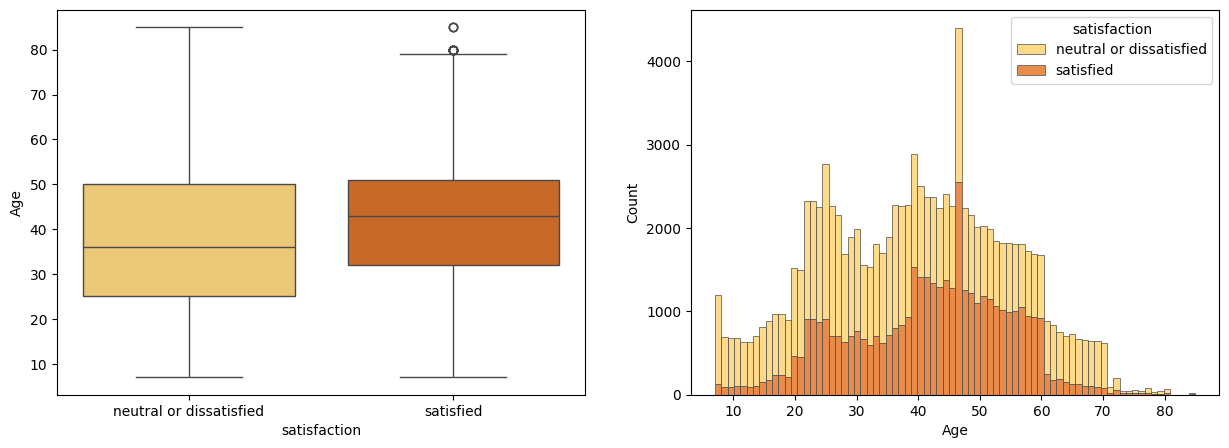

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "satisfaction", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(data=df, x = "Age", hue = "satisfaction", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

In [ ]:
# Calcular o IQR para a coluna
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)]

print(outliers.shape)

(0, 22)


### Departure Delay in Minutes

In [ ]:
df['Departure Delay in Minutes'].describe()


,Departure Delay in Minutes
count,101613.000000
mean,14.799150
std,38.179992
min,0.000000
25%,0.000000
50%,0.000000
75%,12.000000
max,1592.000000


**Distribuição dos Dados:** A mediana (50%) e o primeiro quartil (25%) são ambos 0, indicando que pelo menos metade dos voos não teve nenhum atraso de partida. Isso sugere que os dados são altamente assimétricos, com muitos valores sendo 0 e uma longa cauda de valores maiores.

**Outliers:** O valor máximo é 1592, o que é significativamente maior que a média e os quartis. Isso indica a presença de outliers, que podem afetar a performance de alguns modelos de machine learning.

Para lidar com a alta assimetria, foi aplicado uma **transformação logarítmica**

In [ ]:
df['Departure Delay in Minutes'] = np.log1p(df['Departure Delay in Minutes'])

In [ ]:
# Calcular o IQR para a coluna
Q1 = df["Departure Delay in Minutes"].quantile(0.25)
Q3 = df["Departure Delay in Minutes"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites superior e inferior para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df["Departure Delay in Minutes"] < lower_bound) | (df["Departure Delay in Minutes"] > upper_bound)]

print(outliers.shape)

(17, 22)


In [ ]:
# removendo outliers
df = df[(df['Departure Delay in Minutes'] >= lower_bound) & (df['Departure Delay in Minutes'] <= upper_bound)]

### Normalizando com MINMAX Scaler


In [ ]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

In [ ]:
numerical_columns

['Age', 'Flight Distance', 'Departure Delay in Minutes']

In [ ]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Lidando com dados categoricos

In [ ]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'category']

In [ ]:
data_categorical = pd.get_dummies(df[categorical_columns]).astype(int)

## Montando a base de dados e separando conjuntos de treinamento e validação

In [ ]:
data = pd.concat([df[numerical_columns], data_categorical, df.iloc[:,ordinal_columns]], axis=1)

In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,...,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000,101596.000000
mean,0.413966,0.296243,0.192928,0.507451,0.492549,0.813329,0.186671,0.682989,0.317011,0.466672,...,3.198403,3.236151,3.429141,3.348577,3.375399,3.342494,3.628115,3.300238,3.637131,3.280493
std,0.194403,0.248616,0.252929,0.499947,0.499947,0.389649,0.389649,0.465314,0.465314,0.498890,...,1.330897,1.351397,1.322145,1.335466,1.289677,1.316960,1.181678,1.266540,1.176515,1.314166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.256410,0.101484,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,0.423077,0.211336,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,0.564103,0.439676,0.400861,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
target = df['satisfaction']

In [ ]:
print(data.shape)

(101596, 26)


In [ ]:
X_train = data
y_train = target
N, d = X_train.shape
N, d

(101596, 26)

## Lidando com a base de teste


In [ ]:
# Caminho para o arquivo no Google Drive
file_path_test = '/content/drive/My Drive/test.csv'

# Ler o arquivo usando pandas
df_test = pd.read_csv(file_path_test)

In [ ]:
print(df_test.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [ ]:
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

In [ ]:
for col in colunas_categoricas:
  df_test[df_test.columns[col]] = df_test[df_test.columns[col]].astype('category')

In [ ]:
df_test.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [ ]:
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])

In [ ]:
test_categorical_data = pd.get_dummies(df_test[categorical_columns]).astype(int)

In [ ]:
data_test = pd.concat([df_test[numerical_columns], test_categorical_data, df_test.iloc[:,ordinal_columns]], axis=1)

In [ ]:
data_test.describe()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,0.418217,0.234812,0.012683,0.507083,0.492917,0.815253,0.184747,0.694410,0.305590,0.481021,...,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226
std,0.194047,0.201673,0.033177,0.499959,0.499959,0.388100,0.388100,0.460666,0.460666,0.499649,...,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.256410,0.077342,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,0.423077,0.165186,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,0.564103,0.345921,0.010638,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
X_test = data_test
y_test = df_test['satisfaction']

## Random Forest


In [ ]:
from sklearn.model_selection import GridSearchCV

def fit_predict(X_train, X_test, y_train, model, parameters_grid):

    # define grid search
    grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=10, n_jobs=-1)

    # fit estimator
    grid_search.fit(X_train, y_train)

    # get best estimator
    best = grid_search.best_estimator_

    # predict
    y_pred = best.predict(X_test)

    return y_pred, grid_search

In [ ]:
def get_class_metrics(y_test, y_pred):

    # calculate accuracy and f1-score
    acc = round(accuracy_score(y_test, y_pred), 3)
    scores = [acc]

    # Get confusion matrix
    mat = confusion_matrix(y_test, y_pred)

    # create confusion matrix
    sns.heatmap(mat, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)

    return scores, plt


Para treinar o modelo de Random Forest, definimos os hiperparâmetros contidos em ```parameters_grid``` para realizar um grid search e buscar os melhores parâmetros para nosso modelo.




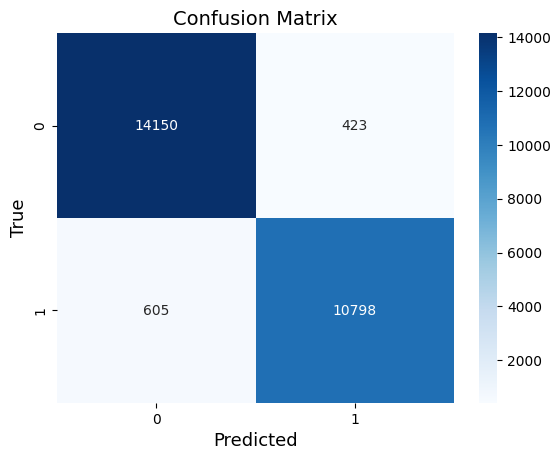

In [ ]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix

# Criação e treinamento do modelo RandomForest
rf = ensemble.RandomForestClassifier(random_state=42)

parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [50, 100],
}


y_pred, grid_search = fit_predict(X_train, X_test, y_train, rf, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)


In [ ]:
grid_search.best_params_


{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100}

In [ ]:
pip install scikit-plot

Abaixo estão definidas as funções ```compute_performance_metrics```, para relizar o cálculo das métricas e plotar o valor do KS, e ```print_metrics_summary``` para exibir os valores das métricas.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, average_precision_score
import scikitplot as skplt

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class,average='macro')
    precision = precision_score(y, y_pred_class, average='macro')
    f1 = f1_score(y, y_pred_class, average='macro')
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores, pos_label='satisfied')
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics


In [ ]:
def print_metrics_summary(accuracy, recall, precision, f1, auroc=None, aupr=None):
    print()
    print("{metric:<18}{value:.4f}".format(metric="Accuracy:", value=accuracy))
    print("{metric:<18}{value:.4f}".format(metric="Recall:", value=recall))
    print("{metric:<18}{value:.4f}".format(metric="Precision:", value=precision))
    print("{metric:<18}{value:.4f}".format(metric="F1:", value=f1))
    if auroc is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUROC:", value=auroc))
    if aupr is not None:
        print("{metric:<18}{value:.4f}".format(metric="AUPR:", value=aupr))

In [ ]:
gb_pred_scores = grid_search.predict_proba(X_test)

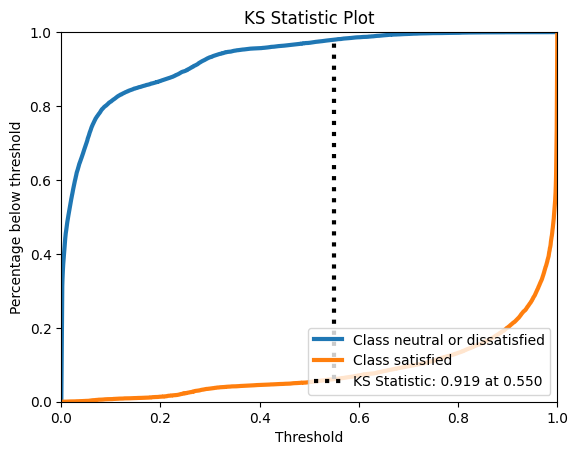

In [ ]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, gb_pred_scores)


Este valor de KS é alto, indicando uma boa separação entre as classes.

In [ ]:
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Accuracy:         0.9604
Recall:           0.9590
Precision:        0.9606
F1:               0.9598
AUROC:            0.9932
AUPR:             0.9924


Esses resultados indicam que o modelo tem um excelente desempenho em termos de acurácia, precisão, recall e métricas baseadas em curvas (AUROC e AUPR), o que sugere que ele está bem ajustado e é eficaz na tarefa de classificação.

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

Para treinar o MLP definimos os hiperparâmetros contidos em parameters_grid para realizar um grid search e buscar os melhores parâmetros para nosso modelo.

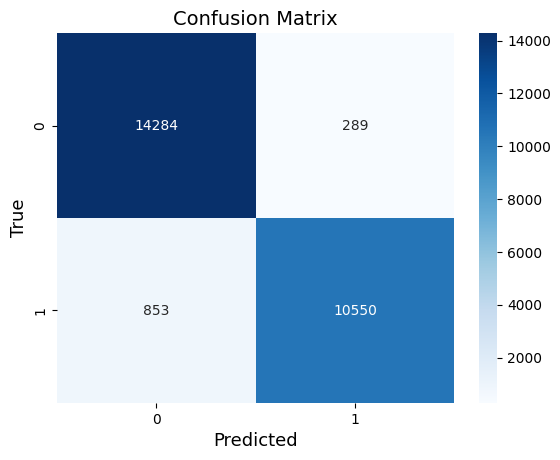

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

parameters_grid = {
    'hidden_layer_sizes': [(20,), (50,)],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, mlp, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [ ]:
grid_search.best_params_

{'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

In [ ]:
gb_pred_scores = grid_search.predict_proba(X_test)

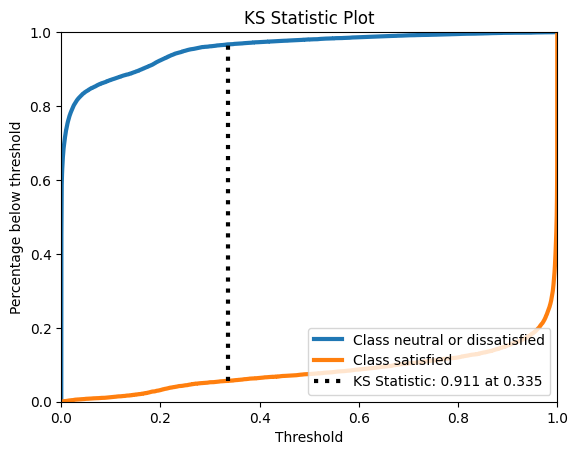

In [ ]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, gb_pred_scores)

Este valor de KS é alto, indicando uma boa separação entre as classes.

In [ ]:
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Accuracy:         0.9560
Recall:           0.9527
Precision:        0.9585
F1:               0.9551
AUROC:            0.9930
AUPR:             0.9919


Esses resultados indicam que o modelo tem um excelente desempenho em termos de acurácia, precisão, recall e métricas baseadas em curvas (AUROC e AUPR), o que sugere que ele está bem ajustado e é eficaz na tarefa de classificação.

## XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

```space``` define um espaço de busca para a otimização de hiperparâmetros do modelo do xgboost

In [ ]:
# Inicializa o espaço de domínio para intervalo de valores
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

A função `objective(space)` tem o objetivo de otimizar os hiperparâmetros de um modelo XGBoost utilizando a biblioteca Hyperopt. Aqui estão os passos detalhados do que a função faz:

1. **Criação do Modelo**:
   - Um modelo XGBoost é criado utilizando os parâmetros fornecidos no espaço de busca (`space`). Os hiperparâmetros incluem `n_estimators`, `max_depth`, `gamma`, `reg_alpha`, `min_child_weight` e `colsample_bytree`.

2. **Configuração da Avaliação**:
   - A avaliação é configurada utilizando `early_stopping_rounds` com 10 iterações e a métrica de avaliação é definida como "auc" (Área sob a Curva ROC).

3. **Treinamento do Modelo**:
   - O modelo é treinado com o conjunto de treino (`X_train`, `y_train`) e avaliado utilizando um conjunto de validação (`X_test`, `y_test`).

4. **Predição e Cálculo da Acurácia**:
   - O modelo faz previsões no conjunto de teste (`X_test`) e a acurácia é calculada comparando as previsões (`pred`) com os valores reais (`y_test`).

5. **Retorno da Métrica de Perda**:
   - A função retorna a acurácia negativa como a métrica de perda (`loss`) para a otimização. O Hyperopt tenta minimizar essa métrica, então a acurácia é negada para que a otimização funcione corretamente.

Este processo ajuda a encontrar a melhor combinação de hiperparâmetros para o modelo XGBoost, maximizando a performance no conjunto de teste.

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    early_stopping_rounds=10, eval_metric="auc",
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation
            ,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
y_train.replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace=True)

In [ ]:
y_test.replace({"neutral or dissatisfied": 0, "satisfied": 1}, inplace=True)

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.8950184785956268
SCORE:
0.8952494610409609
SCORE:
0.8955574376347397
SCORE:
0.8952879581151832
SCORE:
0.8946335078534031
SCORE:
0.8954034493378503
SCORE:
0.8946720049276256
SCORE:
0.8950954727440714
SCORE:
0.894825993224515
SCORE:
0.8952494610409609
SCORE:
0.8948644902987373
SCORE:
0.8950184785956268
SCORE:
0.8945950107791808
SCORE:
0.8949029873729597
SCORE:
0.8951339698182939
SCORE:
0.8952494610409609
SCORE:
0.8954034493378503
SCORE:
0.8954419464120726
SCORE:
0.8954034493378503
SCORE:
0.8945950107791808
SCORE:
0.8951724668925162
SCORE:
0.8952879581151832
SCORE:
0.8954419464120726
SCORE:
0.8952879581151832
SCORE:
0.8951339698182939
SCORE:
0.8951724668925162
SCORE:
0.8953264551894056
SCORE:
0.8952494610409609
SCORE:
0.8946720049276256
SCORE:
0.8951724668925162
SCORE:
0.8954034493378503
SCORE:
0.895364952263628
SCORE:
0.8952494610409609
SCORE:
0.8951339698182939
SCORE:
0.8948644902987373
SCORE:
0.8949799815214043
SCORE:
0.8951339698182939
SCORE:
0.8950954727440714
SCORE:
0.89524

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.6173861810881381, 'gamma': 3.272081953187687, 'max_depth': 16.0, 'min_child_weight': 0.0, 'reg_alpha': 66.0, 'reg_lambda': 0.9183072348395448}


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
xgb_result = cross_val_score(estimator= xgb.XGBClassifier(random_state=2), X=X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4)

In [ ]:
xgb_mean = xgb_result.mean()
xbg_std = xgb_result.std()

In [ ]:
model_xgb = xgb.XGBClassifier(random_state =2)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [ ]:
#Predicting and calculating accuracy score
pred_xgb = model_xgb.predict(X_test)
accuracy_score(y_test,pred_xgb)

0.9633507853403142

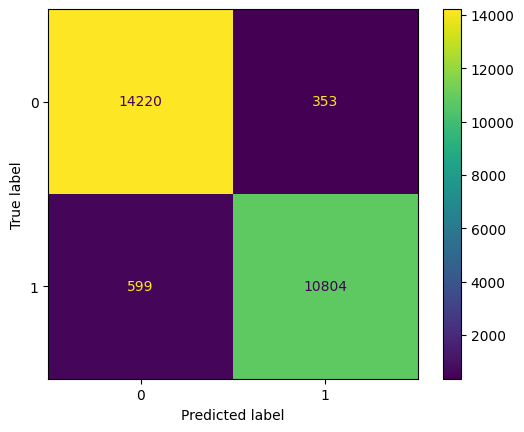

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model_xgb, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred_xgb))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class,average='macro')
    precision = precision_score(y, y_pred_class, average='macro')
    f1 = f1_score(y, y_pred_class, average='macro')
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores, pos_label=1)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

In [ ]:
gb_pred_scores =  model_xgb.predict_proba(X_test)

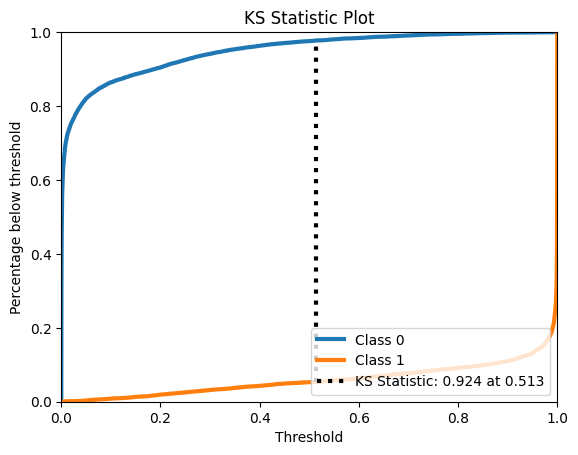

In [ ]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, pred_xgb, gb_pred_scores)

Este valor de KS é alto, indicando uma boa separação entre as classes.

In [ ]:
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)


Accuracy:         0.9634
Recall:           0.9616
Precision:        0.9640
F1:               0.9627
AUROC:            0.9948
AUPR:             0.9940


Esses resultados indicam que o modelo tem um excelente desempenho em termos de acurácia, precisão, recall e métricas baseadas em curvas (AUROC e AUPR), o que sugere que ele está bem ajustado e é eficaz na tarefa de classificação.